## Importing Libraries

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipcodes as zcode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score


## Reading and Exploring Dataset

In [401]:
data=pd.read_csv(r"D:\Downloads\bankloan.csv")

In [402]:
data.head(5)

ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Data Description

* ID : unique identifier 

* Age : customer’s age
* Experience : number of years of profession experience
* Income : annual income of the customer in thousand dollars
* Zip code: home address zip code
* Family : family size of customer
* CCAvg : average spending on credit cards per month in thousand dollars
* Education: education level (1) undergraduate, (2) graduate, (3) advanced degree
* Mortgage : value of house mortgage in thousand dollars
* Personal Loan : did the customer accept the personal load offered (1=Yes, 0=No)
* Securities.Account : does the customer have a securities account with the bank? (1=Yes, 0=No)
* CD.Account : does the customer have a certificate of deposit with the bank? (1=Yes, 0=No)
* Online : does the customer use Internet banking facilities (1=Yes, 0=No)
* CreditCard : does the customer use a credit card issued by Universal Bank? (1=Yes, 0=No)


## Handling ZIP code

In [403]:
import zipcodes as zcode
list_zipcode = list(data['ZIP.Code'])
County = []


for x in list_zipcode :
    my_city_county = zcode.matching(str(x))
    if len(my_city_county) == 1 : # There is information about zipcode
        county = my_city_county[0].get('county')
    else :
        county = 'NotFound'
    County.append(county)

In [404]:
data['Location'] = County

In [405]:
data['Location'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
NotFound                    34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

### Based on knowlege and search I found out that all these counties located in US

In [406]:
data[data.Location=='NotFound']['ZIP.Code'].value_counts()

92717    22
96651     6
92634     5
9307      1
Name: ZIP.Code, dtype: int64

In [407]:
# 92717
col = list(data[data['ZIP.Code']==92717].index)

for c in col :
    data.at[c, 'Location']='Irvine'  

In [408]:
# 92634     
col = list(data[data['ZIP.Code']==92634].index)

for c in col :
    data.at[c, 'Location']='Fullerton'

In [409]:
# 96651
# its not in US
col = list(data[data['ZIP.Code']==96651].index)
for c in col :
    data.drop(index=c, inplace=True)

In [410]:
#9307 
# its not in US
col = list(data[data['ZIP.Code']==9307 ].index)
for c in col :
    data.drop(index=c, inplace=True)

# EDA

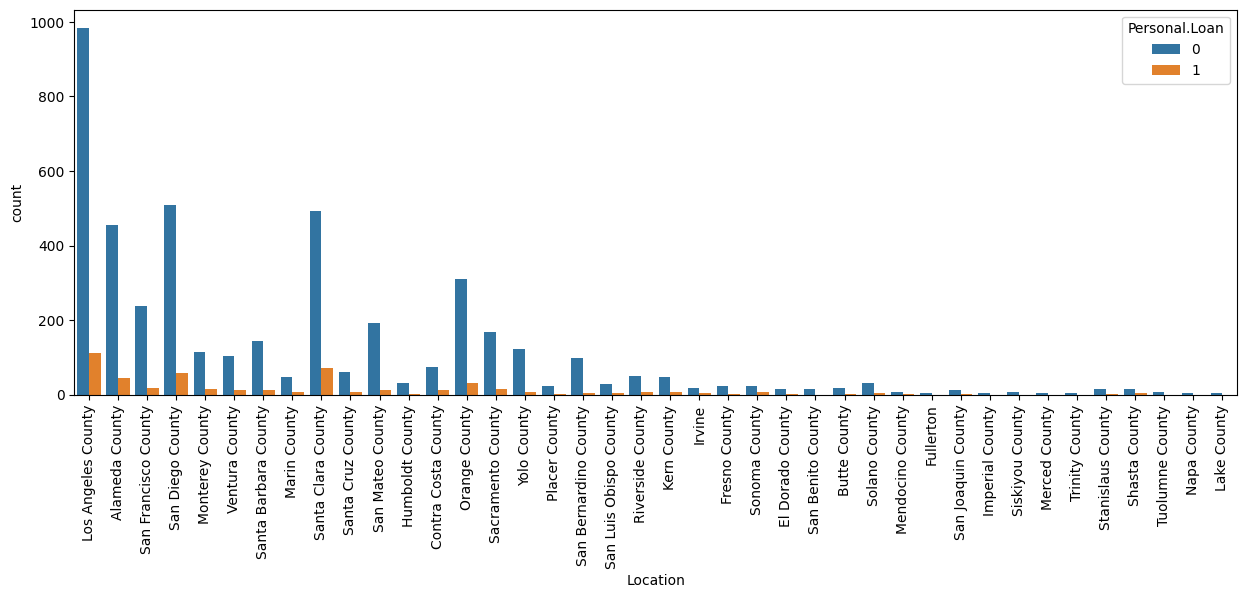

In [411]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Location', hue='Personal.Loan')
ax.tick_params(axis='x', rotation=90)

In [412]:
columns_to_plot = ['Education', 'Personal.Loan', 'Securities.Account','CD.Account', 'Online', 'CreditCard']

# Loop through each column and create a pie chart
for column in columns_to_plot:
    column_counts = data[column].value_counts()

    # Create a pie chart for the current column
    fig = px.pie(names=column_counts.index, values=column_counts.values, title=f'Percentage of {column} Values',hole=0.3,
                 color_discrete_sequence=['orange','red','brown'])
    fig.update_layout(paper_bgcolor='lightblue')

    # Show the pie chart
    fig.show()

In [413]:
data.shape

(4993, 15)

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4993 non-null   int64  
 1   Age                 4993 non-null   int64  
 2   Experience          4993 non-null   int64  
 3   Income              4993 non-null   int64  
 4   ZIP.Code            4993 non-null   int64  
 5   Family              4993 non-null   int64  
 6   CCAvg               4993 non-null   float64
 7   Education           4993 non-null   int64  
 8   Mortgage            4993 non-null   int64  
 9   Personal.Loan       4993 non-null   int64  
 10  Securities.Account  4993 non-null   int64  
 11  CD.Account          4993 non-null   int64  
 12  Online              4993 non-null   int64  
 13  CreditCard          4993 non-null   int64  
 14  Location            4993 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 624.1

In [415]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
Location              0
dtype: int64

In [416]:
data.duplicated().sum()

0

In [417]:
data.describe().T

count          mean          std      min      25%  \
ID                  4993.0   2501.796916  1443.540369      1.0   1252.0   
Age                 4993.0     45.344883    11.461248     23.0     35.0   
Experience          4993.0     20.110755    11.466277     -3.0     10.0   
Income              4993.0     73.836771    46.032623      8.0     39.0   
ZIP.Code            4993.0  93165.091528  1756.540261  90005.0  91911.0   
Family              4993.0      2.396155     1.147601      1.0      1.0   
CCAvg               4993.0      1.939734     1.748169      0.0      0.7   
Education           4993.0      1.880433     0.839674      1.0      1.0   
Mortgage            4993.0     56.531744   101.762415      0.0      0.0   
Personal.Loan       4993.0      0.096135     0.294805      0.0      0.0   
Securities.Account  4993.0      0.104546     0.305999      0.0      0.0   
CD.Account          4993.0      0.060485     0.238407      0.0      0.0   
Online              4993.0      0.596836     0.490582      0.0      0.0   
CreditCard          4993.0      0.293811     0.455552      0.0      0.0   

                        50%      75%      max  
ID                   2502.0   3752.0   5000.0  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP.Code            93407.0  94608.0  96150.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal.Loan           0.0      0.0      1.0  
Securities.Account      0.0      0.0      1.0  
CD.Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

#### experience that has negative value. It is illogical if experience variable has a negative value.

In [418]:
data.Experience = abs(data.Experience)

In [419]:
data.describe().T

count          mean          std      min      25%  \
ID                  4993.0   2501.796916  1443.540369      1.0   1252.0   
Age                 4993.0     45.344883    11.461248     23.0     35.0   
Experience          4993.0     20.140797    11.413414      0.0     10.0   
Income              4993.0     73.836771    46.032623      8.0     39.0   
ZIP.Code            4993.0  93165.091528  1756.540261  90005.0  91911.0   
Family              4993.0      2.396155     1.147601      1.0      1.0   
CCAvg               4993.0      1.939734     1.748169      0.0      0.7   
Education           4993.0      1.880433     0.839674      1.0      1.0   
Mortgage            4993.0     56.531744   101.762415      0.0      0.0   
Personal.Loan       4993.0      0.096135     0.294805      0.0      0.0   
Securities.Account  4993.0      0.104546     0.305999      0.0      0.0   
CD.Account          4993.0      0.060485     0.238407      0.0      0.0   
Online              4993.0      0.596836     0.490582      0.0      0.0   
CreditCard          4993.0      0.293811     0.455552      0.0      0.0   

                        50%      75%      max  
ID                   2502.0   3752.0   5000.0  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP.Code            93407.0  94608.0  96150.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal.Loan           0.0      0.0      1.0  
Securities.Account      0.0      0.0      1.0  
CD.Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

* The average income the customer is about 73.77 thousand dollars.

* The average of credit card spending of the customer is about 1.94 thousand dollars.
* The average of customer age is about 45 years old.
* The average family member of customer is about 2 .
* The average education is approximately 2, that means Graduates.

In [420]:
data.apply(lambda x: x.nunique())

ID                    4993
Age                     45
Experience              44
Income                 162
ZIP.Code               465
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
Location                40
dtype: int64

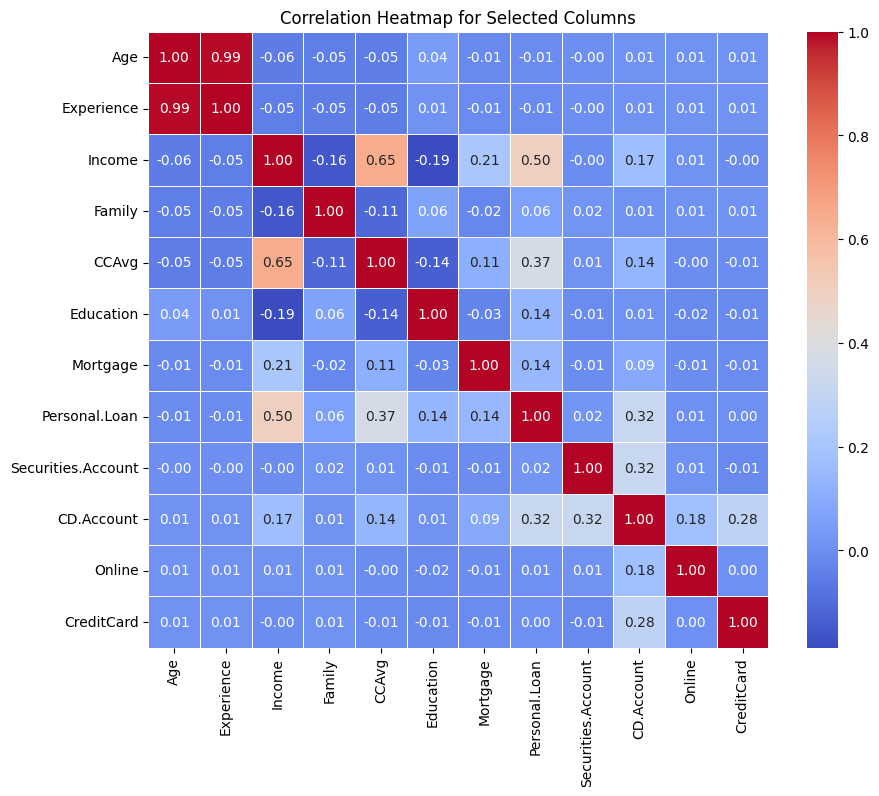

In [421]:
# List of column names for which I want to create a heatmap
columns_to_plot = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard']

# Extract the selected columns
selected_columns = data[columns_to_plot]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

* The age and experience variable are perfectly positive correlation with value is 0.99.

* The income and average credit card spending are moderate positive correlation with value 0.65.
* The Personal Loan and income have a moderate positive correlation with value 0.5.
* Followed by Personal Loan variable with average credit card spending has a weak positive relationship with 0.37.

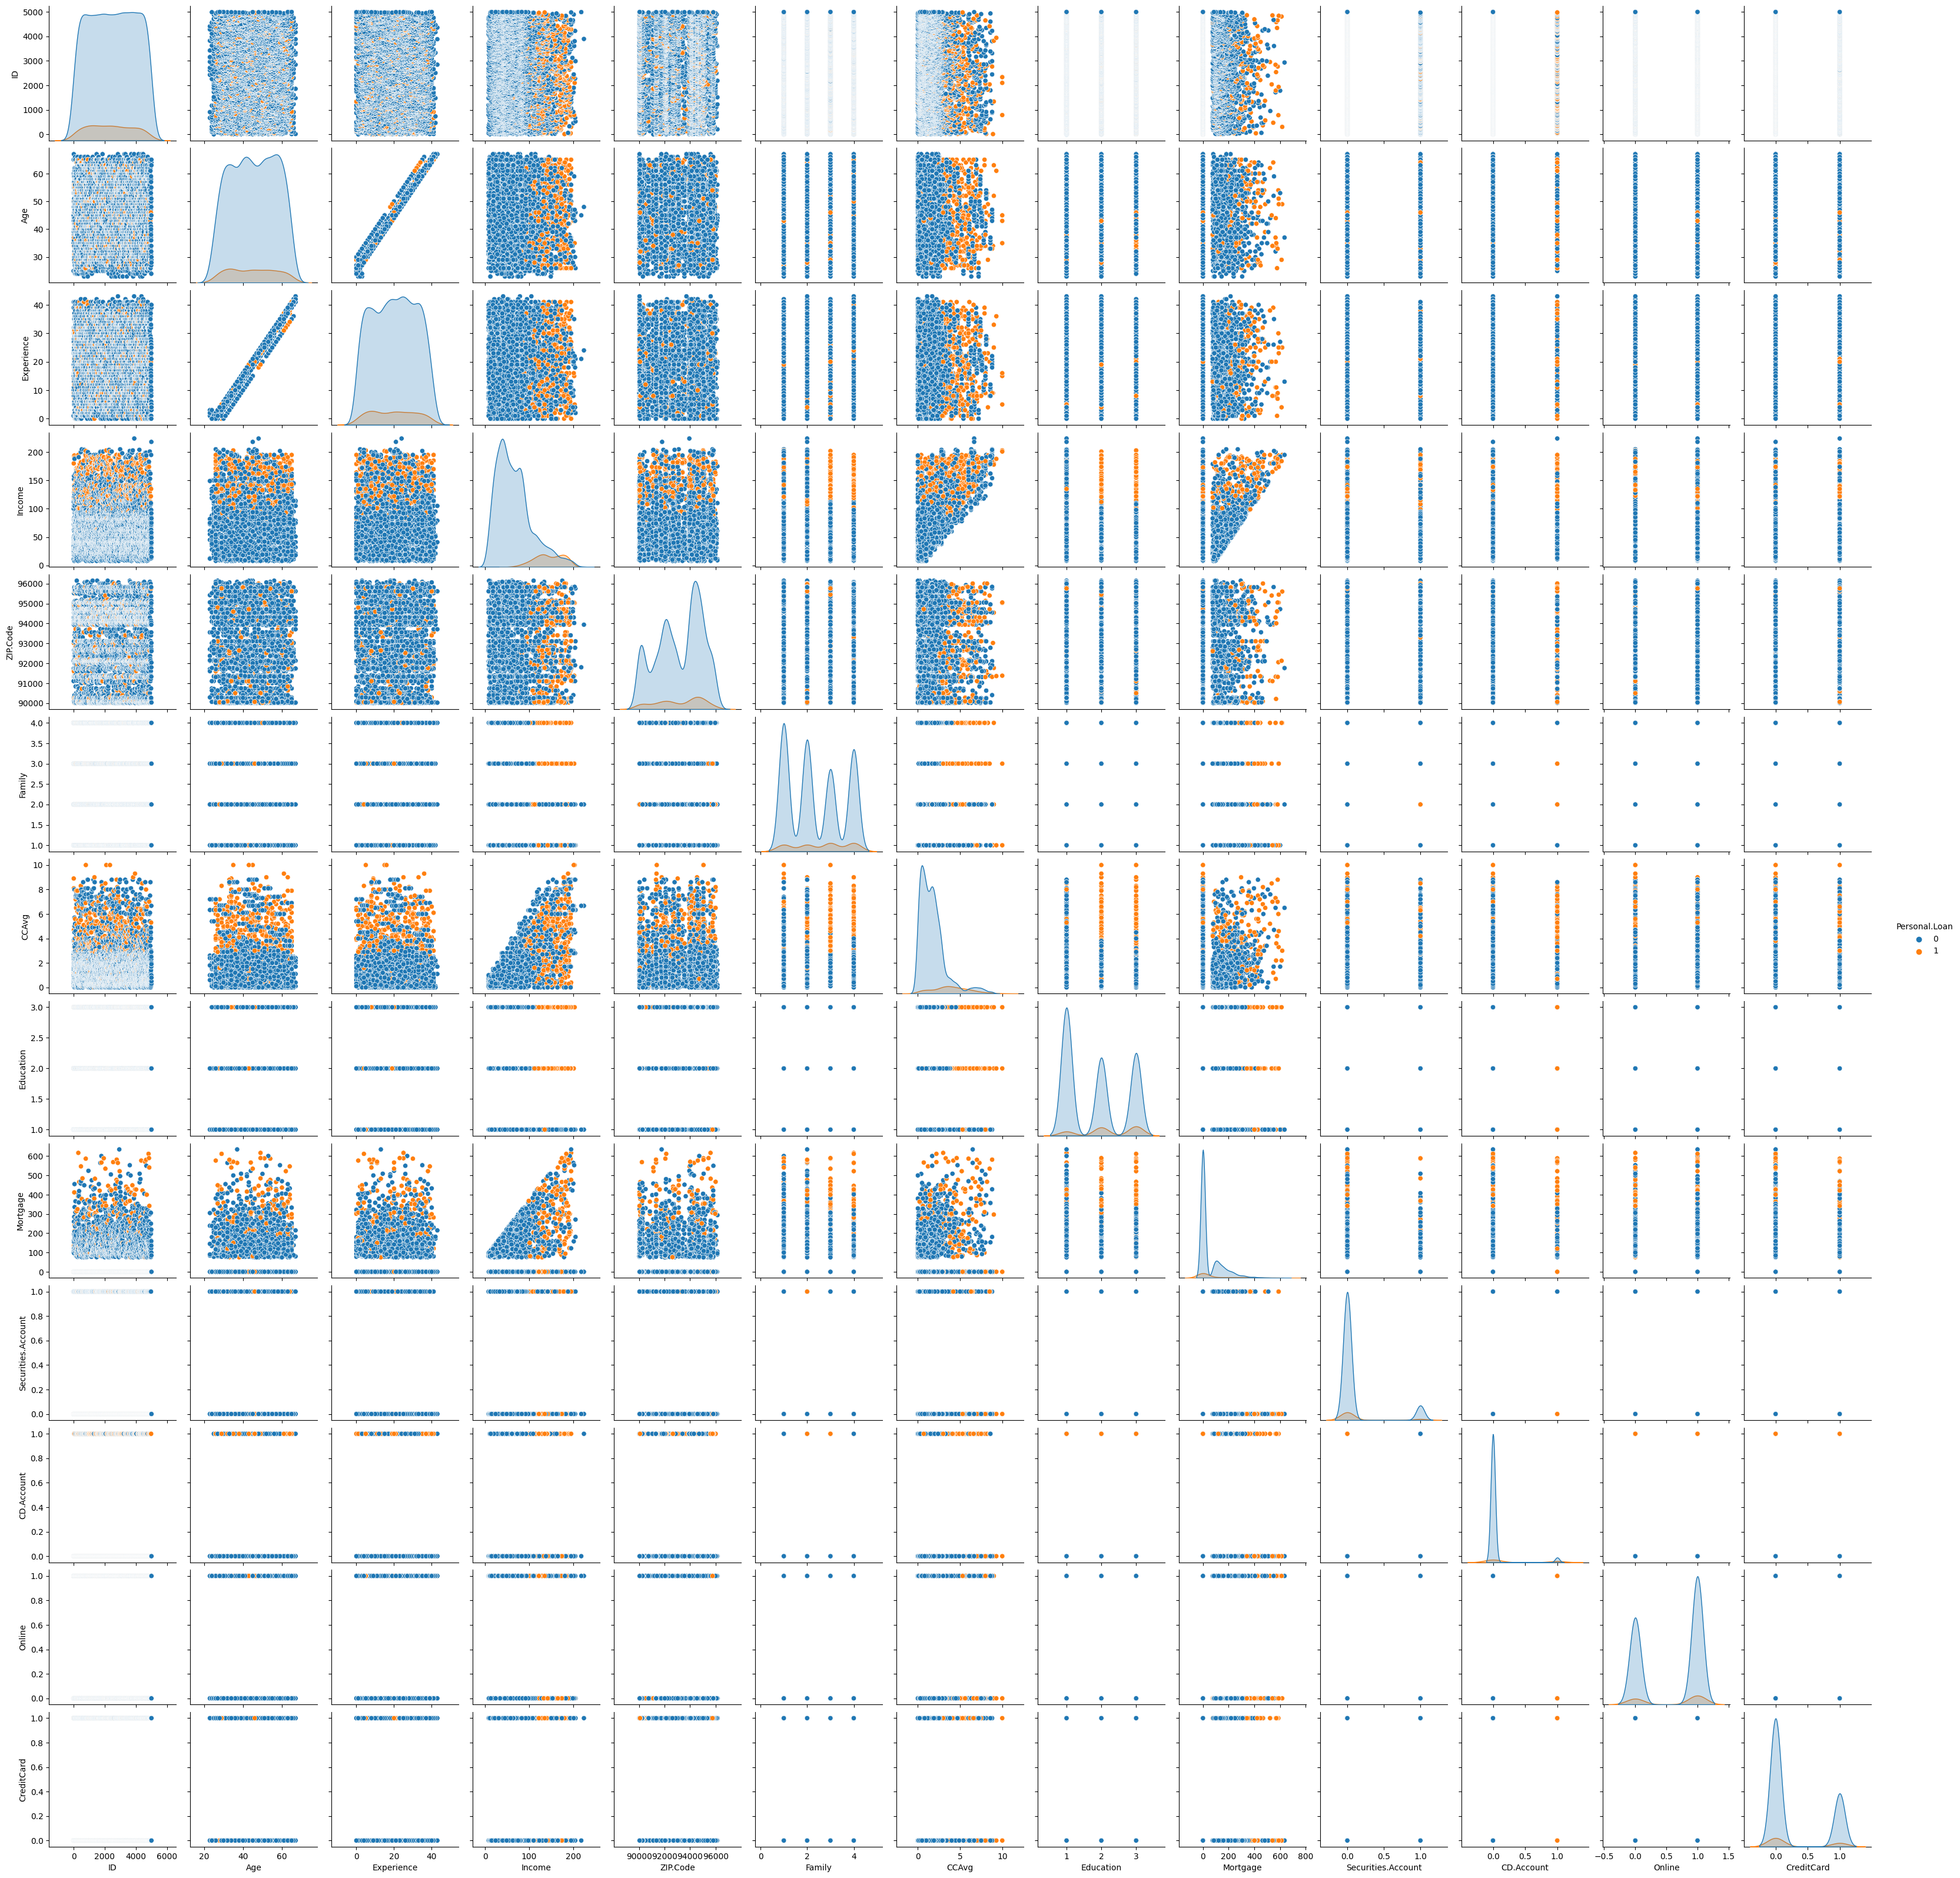

In [422]:
# Create a pair plot
sns.pairplot(data, hue='Personal.Loan')

# Show the plot
plt.show()

* The plot shows the distribution of personal loan in each variable, the line  of income shows the person who approve personal loan is higher in income , also apply to experience , which people that with higher experience tend to approve personal loan.

* The customer who has higher credit card average spending, and higher mortgage value are higher to approve personal loan.

# Handling outliers and Data distribution

In [423]:
columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']
for col in columns:
    fig = px.box(data, x=col, title=f'Box Plot for {col}')
    fig.show()

In [424]:
def calculate_percentage_and_count_of_outliers(data, columns):
    outlier_statistics = []

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = (Q3 - Q1)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

        # Count outliers
        num_of_outliers = outliers.sum()

        # Calculate percentage of outliers
        percentage_of_outliers = (num_of_outliers / len(data[col])) * 100

        # Append results to the list
        outlier_statistics.append({
            'Column': col,
            'Percentage of outliers': percentage_of_outliers,
            'Number of outliers': num_of_outliers
        })

    return pd.DataFrame(outlier_statistics)

In [425]:
columns_to_analyze = ['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']
outlier_statistics = calculate_percentage_and_count_of_outliers(data, columns_to_analyze)

print(outlier_statistics)

       Column  Percentage of outliers  Number of outliers
0         Age                0.000000                   0
1  Experience                0.000000                   0
2      Income                1.922692                  96
3      Family                0.000000                   0
4       CCAvg                6.489085                 324
5    Mortgage                5.828159                 291


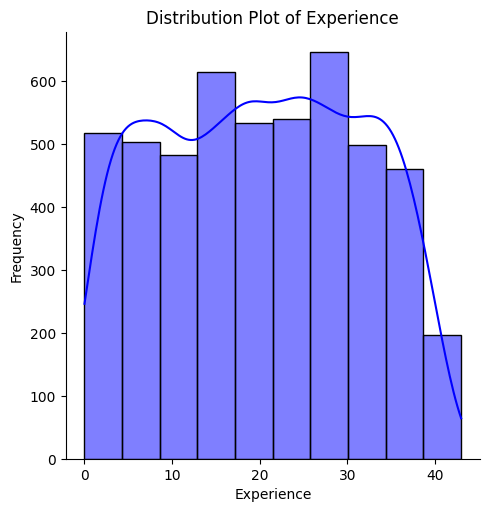

Skewness of Experience: -0.010285027964350707


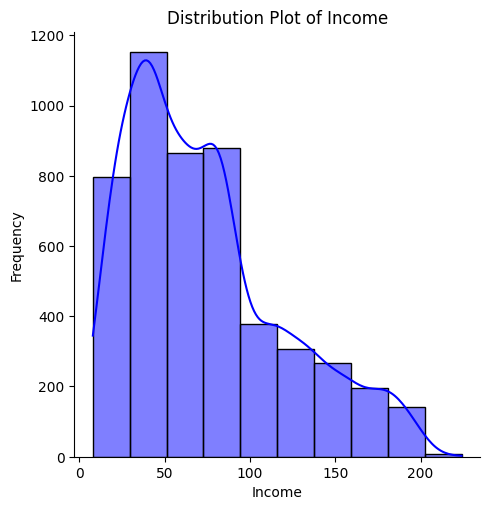

Skewness of Income: 0.8401076772793745


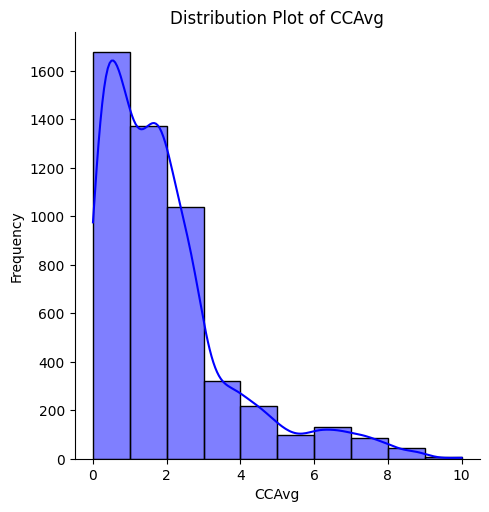

Skewness of CCAvg: 1.5968906467659698


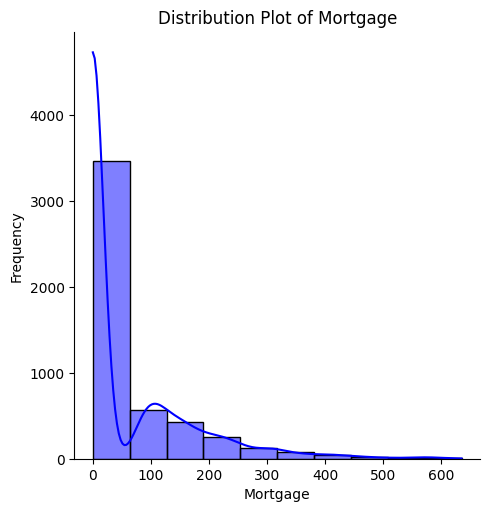

Skewness of Mortgage: 2.103053679993957


In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Experience', 'Income', 'CCAvg', 'Mortgage']

for column_name in columns:
    # Create a distribution plot (displot)
    sns.displot(data[column_name], bins=10, kde=True, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column_name}')

    # Show the plot
    plt.show()

    # Calculate skewness
    skewness = data[column_name].skew()

    # Print skewness
    print(f"Skewness of {column_name}: {skewness}")


In [427]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def show_distributions(data, col):
    # Create subplots
    fig = make_subplots(rows=1, cols=3, subplot_titles=['Log Transformation', 'Cubic Root Transformation', 'Square Root Transformation'])

    # Plotting the first distribution
    fig.add_trace(
        go.Histogram(x=np.log1p(data[col]), nbinsx=30, marker=dict(color='skyblue')),
        row=1, col=1
    )

    # Plotting the second distribution
    fig.add_trace(
        go.Histogram(x=np.cbrt(data[col]), nbinsx=30, marker=dict(color='salmon')),
        row=1, col=2
    )

    # Plotting the third distribution
    fig.add_trace(
        go.Histogram(x=np.sqrt(data[col]), nbinsx=30, marker=dict(color='green')),
        row=1, col=3
    )

    # Update layout
    fig.update_layout(
        title=f'Distributions for column {col}',
        showlegend=False,
        height=400,
        width=1000
    )

    # Show skewness information
    skewness_info = f"Skewness with log = {np.log1p(data[col]).skew():.4f}, cubic root = {np.cbrt(data[col]).skew():.4f}, square root = {np.sqrt(data[col]).skew():.4f}"
    fig.update_layout(annotations=[dict(text=skewness_info, x=0.5, y=-0.2, showarrow=False, xref='paper', yref='paper')])

    # Show the plot
    fig.show()

In [428]:
columns=['Income', 'CCAvg','Mortgage']

for col in columns:
    show_distributions(data,col)

- Log transformation yields the most optimal results for reducing skewness in the "Mortgage" column , resulting in the lowest skewness values among the applied transformations.
- Among the transformations applied, the cubic root transformation demonstrates the most effective skewness reduction for the "Income" and "CCAvg" columns, resulting in the minimum skewness value observed.

In [429]:
data['Income']=np.cbrt(data['Income'])
data['CCAvg']=np.cbrt(data['CCAvg'])
data['Mortgage']=np.log1p(data['Mortgage'])


In [430]:
columns_to_analyze = [ 'Income','CCAvg','Mortgage']
outlier_statistics = calculate_percentage_and_count_of_outliers(data, columns_to_analyze)

print(outlier_statistics)

     Column  Percentage of outliers  Number of outliers
0    Income                0.000000                   0
1     CCAvg                2.443421                 122
2  Mortgage                0.000000                   0


### After Transformation the outliers in Income & Mortgage columns are handeled but yet the CCAvg column

In [431]:
def replace_outliers(data):
    # Identify outliers using IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Replace outliers with lower/upper limit
    data_clipped = np.clip(data, lower_limit, upper_limit)
    
    return data_clipped

data['CCAvg'] = replace_outliers(data['CCAvg'])


## Modeling

In [432]:
target_variable = 'Personal.Loan'

# Separate features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Convert categorical variable 'Location' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Location'] )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [433]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.6041666666666666, 0.9642857142857143, 'Income <= 4.74\ngini = 0.166\nsamples = 3744\nvalue = [3403, 341]\nclass = No loan'),
 Text(0.40540540540540543, 0.8928571428571429, 'CCAvg <= 1.434\ngini = 0.028\nsamples = 2928\nvalue = [2887, 41]\nclass = No loan'),
 Text(0.38738738738738737, 0.8214285714285714, 'gini = 0.0\nsamples = 2742\nvalue = [2742, 0]\nclass = No loan'),
 Text(0.42342342342342343, 0.8214285714285714, 'Income <= 4.506\ngini = 0.344\nsamples = 186\nvalue = [145, 41]\nclass = No loan'),
 Text(0.28378378378378377, 0.75, 'CD.Account <= 0.5\ngini = 0.185\nsamples = 126\nvalue = [113, 13]\nclass = No loan'),
 Text(0.26576576576576577, 0.6785714285714286, 'Age <= 27.0\ngini = 0.149\nsamples = 123\nvalue = [113, 10]\nclass = No loan'),
 Text(0.24774774774774774, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes loan'),
 Text(0.28378378378378377, 0.6071428571428571, 'Experience <= 33.5\ngini = 0.137\nsamples = 122\nvalue = [113, 9]\nclass = No loan'

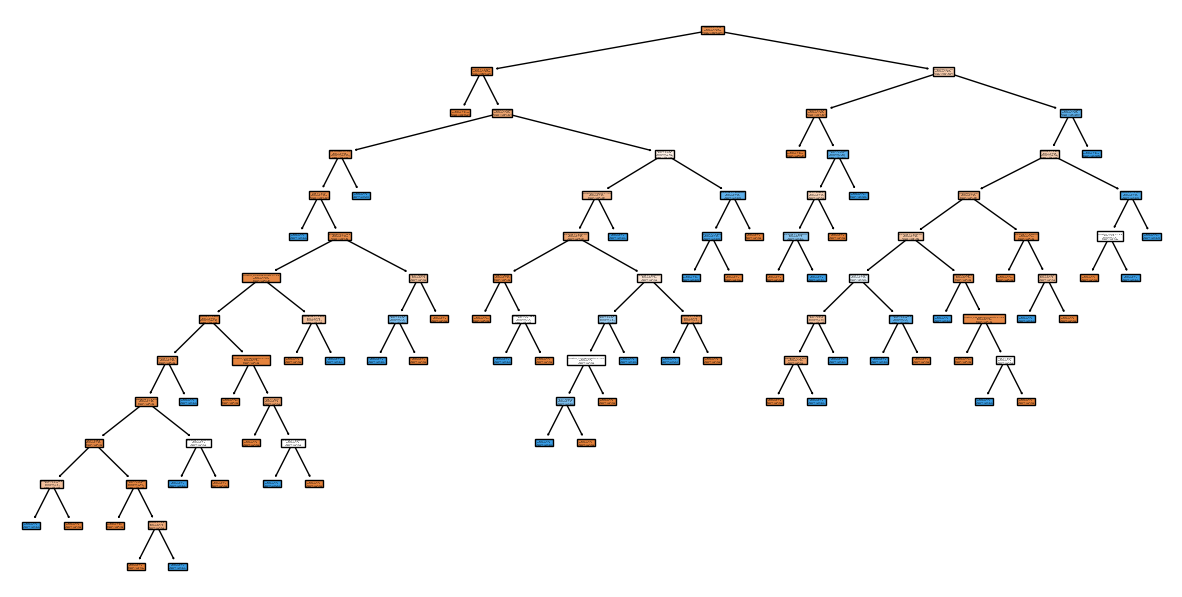

In [434]:
# we can plot the tree but it's huge
from sklearn.tree import plot_tree

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,class_names=["No loan","Yes loan"]
          ,feature_names=X.columns)

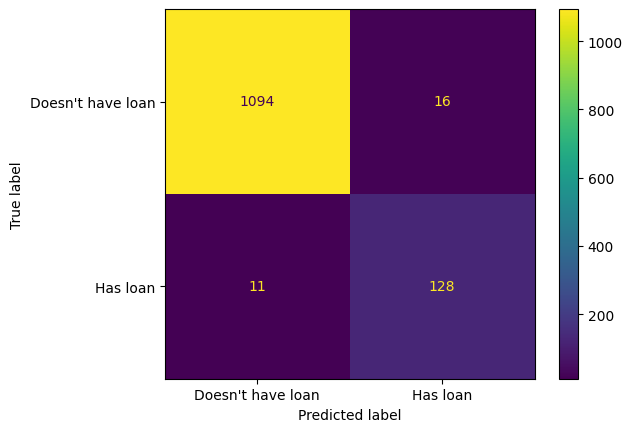

In [435]:
# Calculate the confusion matrix
y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Doesn't have loan", "Has loan"])
disp.plot()
plt.show()

- True positives (TP): The number of people who have a loan and were predicted to have a loan. In this case, there are 128 TPs.
- True negatives (TN): The number of people who don't have a loan and were predicted not to have a loan. In this case, there are 1094 TNs.
- False positives (FP): The number of people who don't have a loan but were predicted to have a loan. In this case, there are 16 FPs.
- False negatives (FN): The number of people who have a loan but were predicted not to have a loan. In this case, there are 11 FNs.

In [436]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Format and print the metrics
output = f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"
print(output)

Accuracy: 0.98
Precision: 0.89
Recall: 0.92
F1 Score: 0.90


## Cost complexity pruning: visulize alpha

##### Because Desicion tree is notorious for being overfit to the training dataseet , so pruning a tree with cost complexity pruning  for finding smaller tree that improves the accuracy with the test dataset

In [437]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha

ccp_alphas = path.ccp_alphas # extract different values for alpha

ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

#now create one decision tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

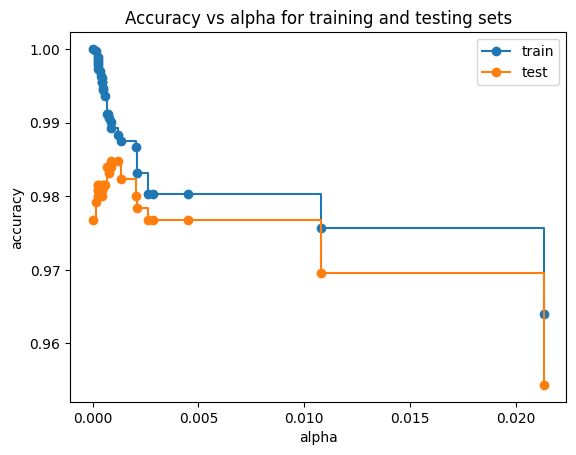

In [438]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]

test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax. legend()

plt.show()

## cost complexity pruning: cross validation to find the best alpha

<AxesSubplot: xlabel='tree'>

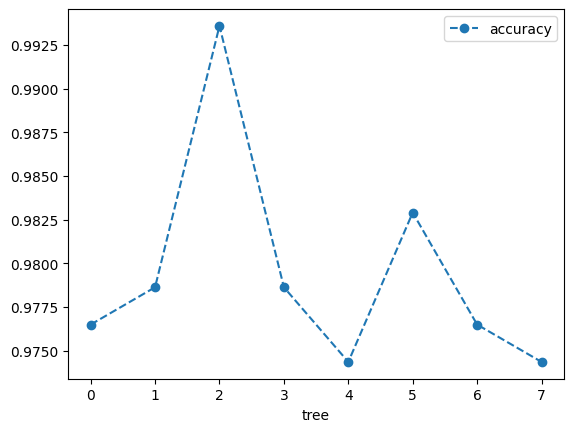

In [439]:
clf_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.004) # create the tree with ccp_alpha=0.004

#now use 8-fold cross validation create 8 different training and testing datasets that are then used to train and test the tree.
#We use 8-fold because we  have moderate data size
scores = cross_val_score(clf_dt, X_train, y_train, cv=8)
df = pd.DataFrame(data={'tree': range(8), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--') 

<AxesSubplot: xlabel='alpha'>

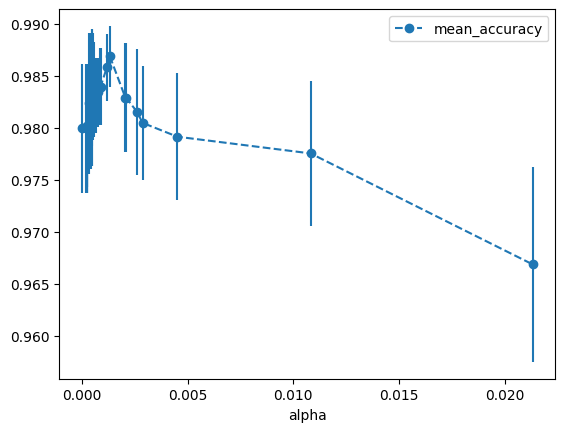

In [440]:
## create an array to store the results of each fold during cross validiation alpha_loop_values = []
alpha_loop_values=[]
## For each candidate value for alpha, we will run 8-fold cross validation.
##Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:

    clf_dt= DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores= cross_val_score(clf_dt, X_train, y_train, cv=8) 
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

##Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o', linestyle='--')

In [441]:
alpha_results[(alpha_results['alpha'] > 0.001) &(alpha_results['alpha'] < 0.004)]

alpha  mean_accuracy       std
21  0.001185       0.985844  0.003194
22  0.001320       0.986912  0.002914
23  0.002060       0.982906  0.005234
24  0.002094       0.982906  0.005234
25  0.002606       0.981571  0.006038
26  0.002869       0.980502  0.005493

In [442]:
alpha_results[(alpha_results['alpha'] > 0.0012) &(alpha_results['alpha'] < 0.002)]


alpha  mean_accuracy       std
22  0.00132       0.986912  0.002914

In [443]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0012) & (alpha_results['alpha'] < 0.002)]['alpha'] 
ideal_ccp_alpha

22    0.00132
Name: alpha, dtype: float64

In [444]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0013203730175274904

# Building , Evaluating the tree

In [445]:
#Build and train a new decision tree, only this time use the optimal value for alpha 

clf_dt_pruned= DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)


#### Now let's draw another confusion matrix to see if the pruned tree does better.

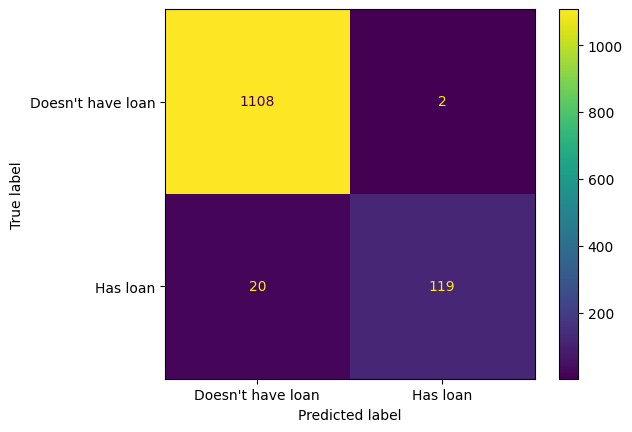

In [446]:
# Calculate the confusion matrix
y_pred = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Doesn't have loan", "Has loan"])
disp.plot()
plt.show()

- True positives (TP): The number of people who have a loan and were predicted to have a loan. In this case, there are 119 TPs.
- True negatives (TN): The number of people who don't have a loan and were predicted not to have a loan. In this case, there are 1108 TNs.
- False positives (FP): The number of people who don't have a loan but were predicted to have a loan. In this case, there are 2 FPs.
- False negatives (FN): The number of people who have a loan but were predicted not to have a loan. In this case, there are 20 FNs.

In [447]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Format and print the metrics
output = f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"
print(output)

Accuracy: 0.98
Precision: 0.98
Recall: 0.86
F1 Score: 0.92


### the model improved

[Text(0.4, 0.9, 'Income <= 4.74\ngini = 0.166\nsamples = 3744\nvalue = [3403, 341]\nclass = No loan'),
 Text(0.13333333333333333, 0.7, 'CCAvg <= 1.434\ngini = 0.028\nsamples = 2928\nvalue = [2887, 41]\nclass = No loan'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 2742\nvalue = [2742, 0]\nclass = No loan'),
 Text(0.2, 0.5, 'Income <= 4.506\ngini = 0.344\nsamples = 186\nvalue = [145, 41]\nclass = No loan'),
 Text(0.13333333333333333, 0.3, 'gini = 0.185\nsamples = 126\nvalue = [113, 13]\nclass = No loan'),
 Text(0.26666666666666666, 0.3, 'Family <= 2.5\ngini = 0.498\nsamples = 60\nvalue = [32, 28]\nclass = No loan'),
 Text(0.2, 0.1, 'gini = 0.414\nsamples = 41\nvalue = [29, 12]\nclass = No loan'),
 Text(0.3333333333333333, 0.1, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]\nclass = Yes loan'),
 Text(0.6666666666666666, 0.7, 'Education <= 1.5\ngini = 0.465\nsamples = 816\nvalue = [516, 300]\nclass = No loan'),
 Text(0.4666666666666667, 0.5, 'Family <= 2.5\ngini = 0.178\nsamples 

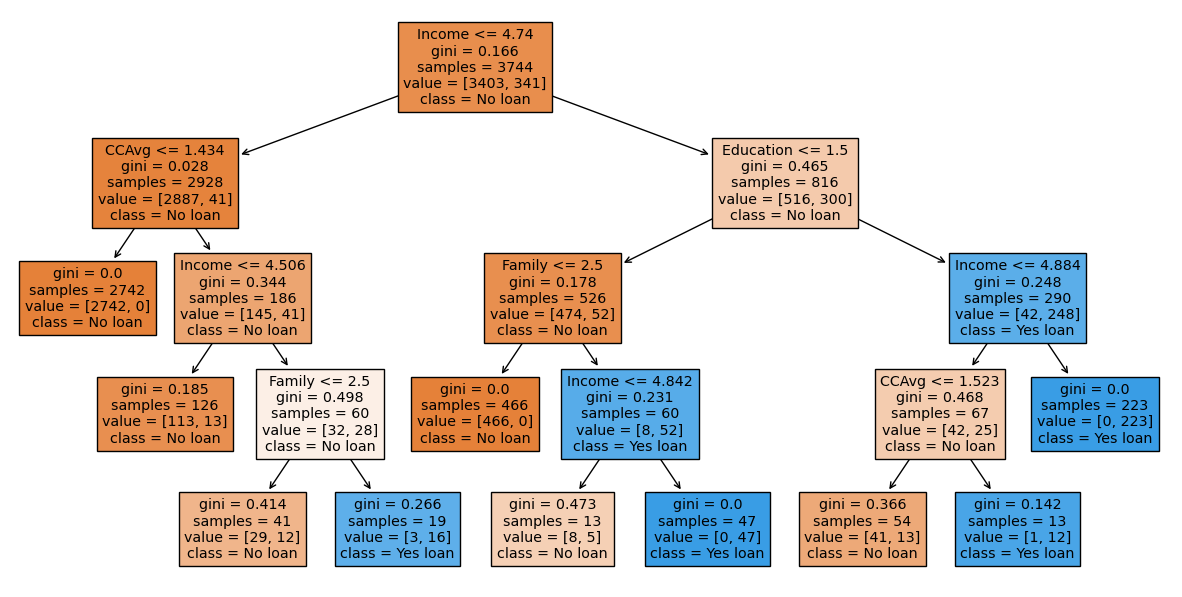

In [448]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,class_names=["No loan","Yes loan"]
          ,feature_names=X.columns)